In [36]:
%matplotlib widget

In [20]:
%cd /mnt/c/Users/natha/code/venera

/mnt/c/Users/natha/code/venera


In [32]:
ROOT_PREFIX = "/mnt/c/Users/natha/Downloads/venus/arecibo_radar/pds-geosciences.wustl.edu/venus/arcb_nrao-v-rtls_gbt-3-delaydoppler-v1/vrm_90xx/"
DATA_PREFIX = ROOT_PREFIX + "data/"
GLOBAL_PREFIX = ROOT_PREFIX + "GLOBAL_TRIAGE_3/"

In [33]:
def parseLbl(filename):
    lbl_filename = DATA_PREFIX + filename[:25] + ".lbl"
    l = {}
    for line in open(lbl_filename).readlines():
        if 'START_TIME' in line:
            l['START_TIME'] = line.split('=')[-1].strip()
        if 'STOP_TIME' in line:
            l['STOP_TIME'] = line.split('=')[-1].strip()
        if 'GEO:BAUD' in line:
            l['GEO_BAUD'] = float(line.split(' ')[-2])
        if 'GEO:CENTROID_LOCATION' in line:
            l['GEO_CENTROID_LOCATION'] = int(line.split('=')[1].strip())
        if 'GEO:DELAY_OFFSET' in line:
            l['GEO_DELAY_OFFSET'] = int(line.split('=')[1].strip())
        if 'GEO:POINTING' in line:
            l['GEO_POINTING'] = line.split('"')[-2]
        if 'GEO:MODE' in line:
            l['GEO_MODE'] = line.split('"')[-2]
    return l

In [34]:
# Build list of good filenames
import os
filenames = os.listdir(GLOBAL_PREFIX)
filenames.sort()
filtered_filenames = []
for filename in filenames:
    if not filename.startswith('venus'): continue
    if not "_2020" in filename: continue
    if not filename.endswith('.png'): continue
    lbl_dict = parseLbl(filename[:25])
    if not lbl_dict['GEO_POINTING'] == 'N': continue
    filtered_filenames.append(filename)

Text(0.5, 1.0, 'Observation durations by year')

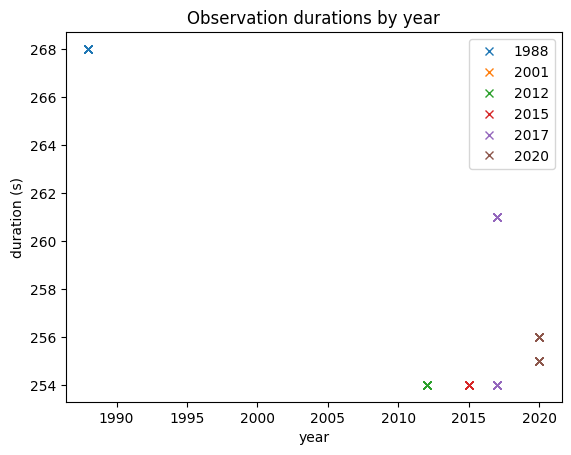

In [19]:
if 0:
    from astropy import time as at
    from matplotlib import pylab as pl

    DURATION = {}
    for filename in filtered_filenames:
        lbl_dict = parseLbl(filename[:25])
        #print(filename, lbl_dict['START_TIME'], lbl_dict['STOP_TIME'])
        startTime = at.Time(lbl_dict['START_TIME'])
        stopTime = at.Time(lbl_dict['STOP_TIME'])
        delta = stopTime - startTime
        DURATION[filename] = delta.sec

if 0:
    #pl.plot(DURATION)
    for y in ("1988", "2001", "2012", "2015", "2017", "2020"):
        d = [v for k,v in DURATION.items() if f"_{y}" in k]
        pl.plot([int(y)] * len(d), d, 'x', label=y)
    pl.legend()
    pl.xlabel('year')
    pl.ylabel('duration (s)')
    pl.title("Observation durations by year")

# ???
# If the point of the 2012 observations was to allow a longer integration time... why aren't the observations longer?!

In [35]:
# Load and cache the concatenated snippets

if 1: 
    import pickle
    import numpy as np
    from matplotlib import pylab as pl
    
    #CS = {}
    for filename in filtered_filenames:
        print(filename)
        im = pl.imread(GLOBAL_PREFIX + filename)
        CS[filename] = np.concatenate((im[500:1500, -1000:], im[500:1500, 0:1000]), axis=1)
    
if 1:
    import pickle
    pickle.dump(CS, open("venera_concatenated_snippets.pkl", "wb"))

try: CS
except: CS = pickle.load(open("venera_concatenated_snippets.pkl", "rb"))

venus_ocp_20200526_163545.png
venus_ocp_20200526_164551.png
venus_ocp_20200526_165557.png
venus_ocp_20200526_170603.png
venus_ocp_20200526_171609.png
venus_ocp_20200526_174627.png
venus_ocp_20200526_175633.png
venus_ocp_20200528_162748.png
venus_ocp_20200528_163746.png
venus_ocp_20200528_164744.png
venus_ocp_20200528_165742.png
venus_ocp_20200528_175025.png
venus_ocp_20200528_180023.png
venus_ocp_20200528_181021.png
venus_ocp_20200530_160549.png
venus_ocp_20200530_161541.png
venus_ocp_20200530_162533.png
venus_ocp_20200530_163525.png
venus_ocp_20200530_165509.png
venus_ocp_20200530_170501.png
venus_ocp_20200530_171453.png
venus_ocp_20200530_172445.png
venus_ocp_20200530_174429.png
venus_ocp_20200530_175421.png


In [29]:
# Load the cached Maxwell Montes "chin" coordinates
import pickle

try: MM
except: MM = pickle.load(open("venera_concatatenated_snippet_MM.pkl", "rb"))
print(len(MM))

186


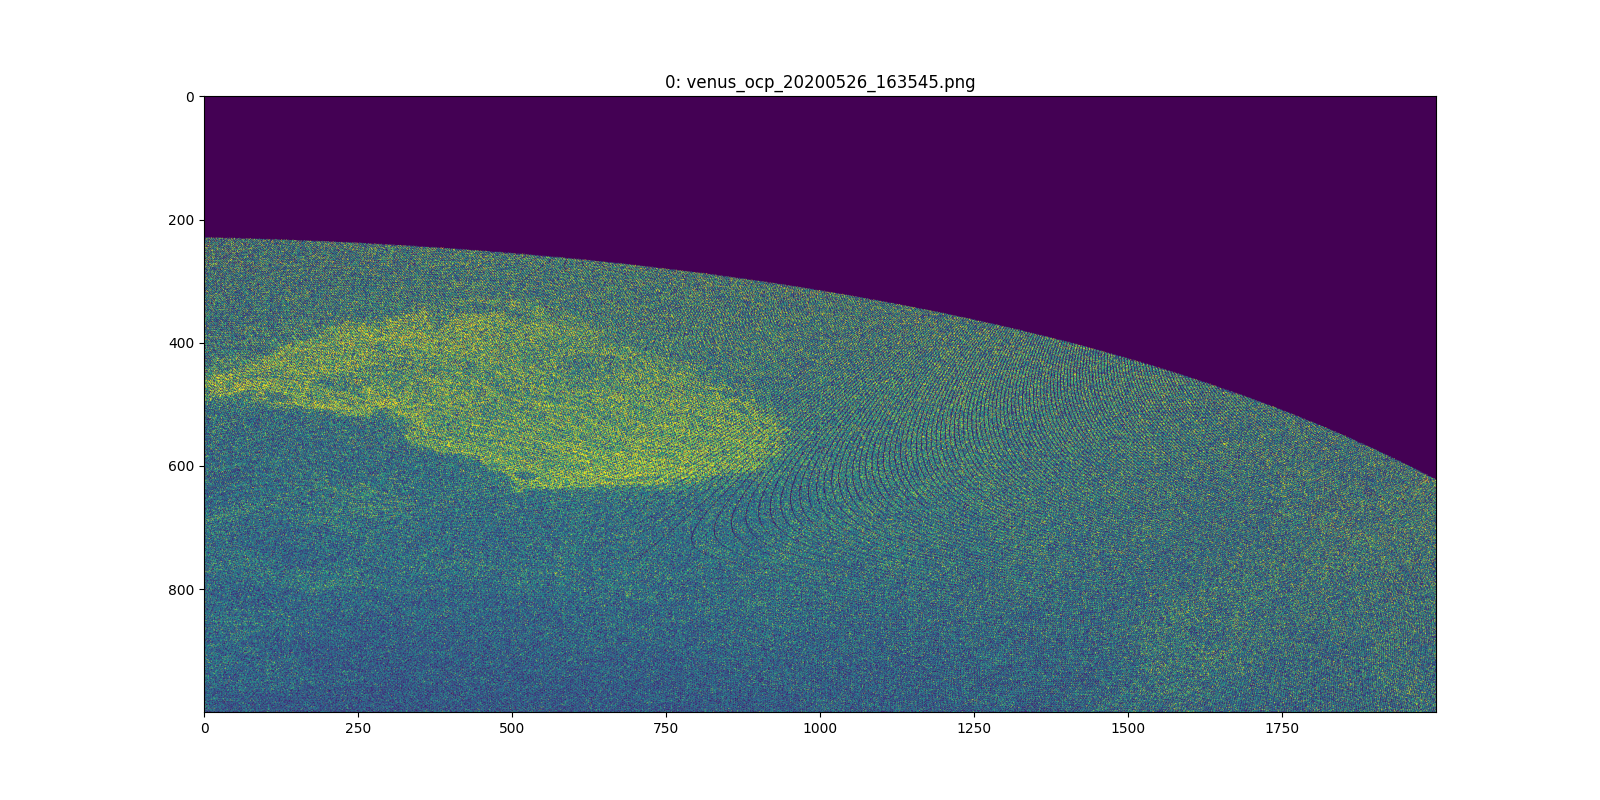

In [37]:
## Load global image, plot a small region around Maxwell Montes
import numpy as np
from matplotlib import pylab as pl
import matplotlib

fig = pl.figure(figsize=(16, 8))
ax = pl.gca()
ax.axis('off')

filtered_index = 0

def onButtonPressEvent(event):
    #print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
    #    ('double' if event.dblclick else 'single', event.button,
    #    event.x, event.y, event.xdata, event.ydata))
    ax.plot(event.xdata, event.ydata, 'rx')
    MM[filtered_filenames[filtered_index]] = (event.xdata, event.ydata)

def onKeyPressEvent(event):
    global filtered_index
    #print(f'{event.key=}')
    if event.key == 'left':
        filtered_index = max(0, filtered_index - 1)
    elif event.key == 'right':
        filtered_index = min(len(filtered_filenames) - 1, filtered_index + 1)
    plotConcatenatedImage()

cid = fig.canvas.mpl_connect('button_press_event', onButtonPressEvent)
cid = fig.canvas.mpl_connect('key_press_event', onKeyPressEvent)

def plotConcatenatedImage():
    ax.cla()
    ff = filtered_filenames[filtered_index]
    ax.imshow(CS[ff])
    ax.set_title(f"{filtered_index}: {ff}")
    if ff in MM:
        x, y = MM[ff]
        ax.plot(x, y, 'rx')

plotConcatenatedImage()

In [38]:
if 1:
    pickle.dump(MM, open("venera_concatatenated_snippet_MM.pkl", "wb"))


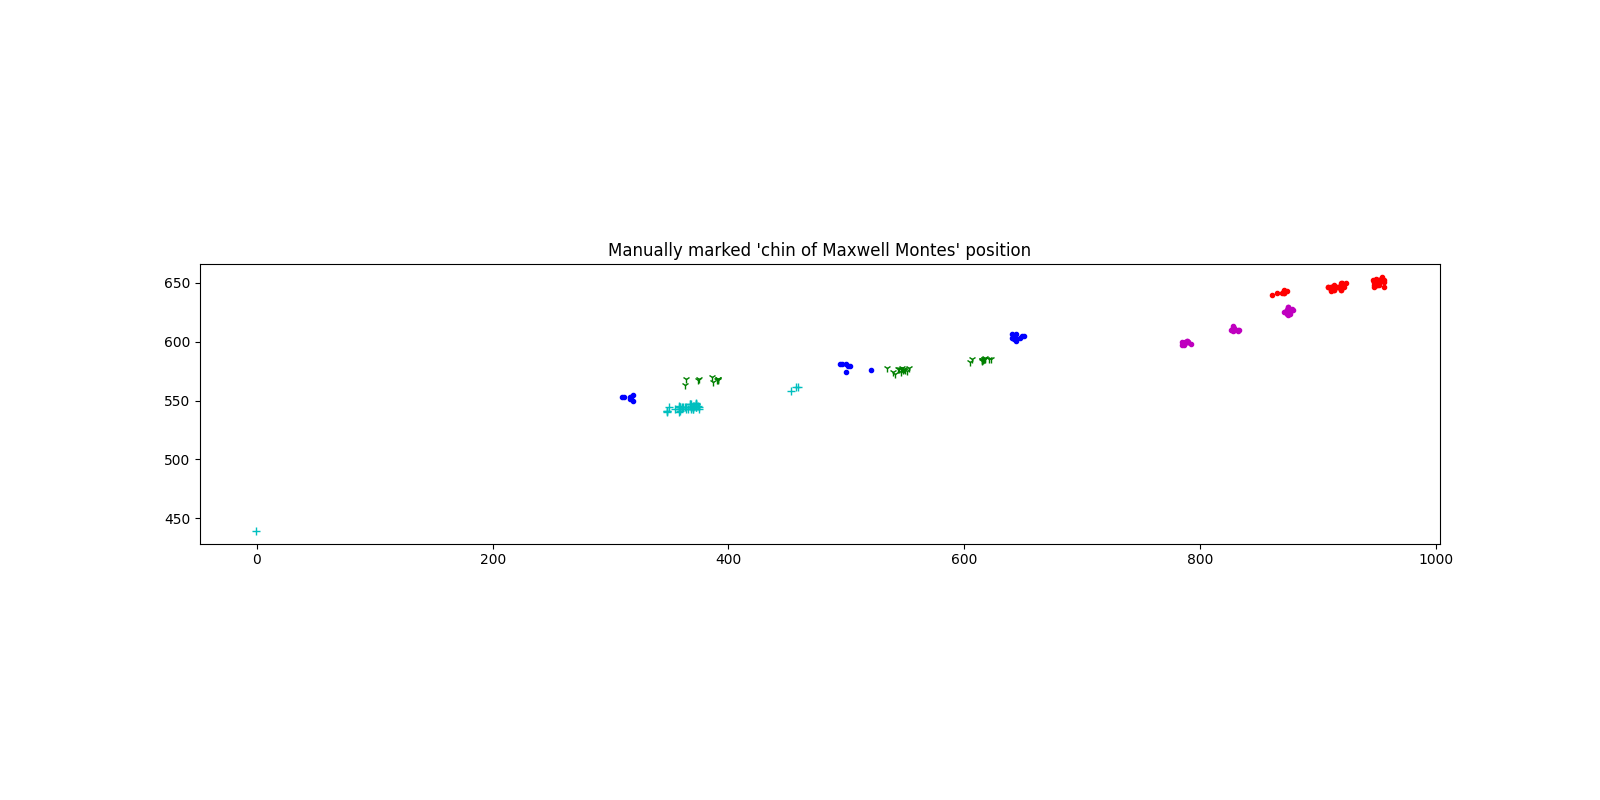

In [39]:
from matplotlib import pylab as pl

pl.clf()
for key in MM:
    cm = 'rx'
    if "_1988" in key: cm = 'g1'
    if "_2001" in key: cm = 'bo'
    if "_2012" in key: cm = 'c+'
    if "_2015" in key: cm = 'm.'
    if "_2017" in key: cm = 'r.'
    if "_2020" in key: cm = 'b.'
    x, y = MM[key]
    pl.plot(x, y, cm, label=key[10:14])
#pl.legend()
pl.title("Manually marked 'chin of Maxwell Montes' position")
pl.axis('scaled')
pl.show()

# ???
# Several things:
# 1. Direction of motion is consistent *within* a season.
# 2. The amount of motion does *not* seem correlated to the *amount* of elapsed time.
#   - The change in position *within* an observation season is greater than the change in position *between* years!
# 3. This would seem to indicate that Venus rotation rate error isn't the primary explanation for the observed noise (though it may explain a smaller underlying trend)

# I had one image that was *way* off... May be informative!?
#  It apperas to be venus_ocp_20120526_163414.png
#  - in the middle of a sequence of observations. no particular reason why it should be so different!
#  - *definitely* worth investigating, since the error is so enormous it may be easier to track down!

# 2020 seemed to be east-west flipped?
# - This also happened to 1988 (and I put in a kludge).
# - How did that happen? Observational setup? Data processing? I've totally messed something up???
# - Is it recoverable from the sign of the "orthogonal" velocity?
#   A: No. Orthogonal velocity is always strongly positive, by definition of how I calculate it... and I think by the way the orbits work out
# - Is there any plausible physical explanation?


# Physically, this position depends on
# - the time of the observation
# - the position, orientation, and velocity of Venus relative to the observatory at Arecibo. (calculated from ephemerides)
#  -- this in turn determines
#    * the sub-radar point,
#    * the north-pole angle,
#    * the doppler angle (relative to the north pole angle)
# - the range and frequency offsets (fit from the doppler/delay image)
# - the frequency scale (related to baud) (fit from the doppler/delay image)


In [29]:
pl.imshow(CS['venus_ocp_20120526_163414.png'])

dict_keys(['venus_ocp_19880617_150830.png', 'venus_ocp_19880617_151830.png', 'venus_ocp_19880617_154030.png', 'venus_ocp_19880617_155040.png', 'venus_ocp_19880617_160050.png', 'venus_ocp_19880617_161050.png', 'venus_ocp_19880617_162050.png', 'venus_ocp_19880617_164410.png', 'venus_ocp_19880618_150330.png', 'venus_ocp_19880618_151340.png', 'venus_ocp_19880618_152420.png', 'venus_ocp_19880618_153510.png', 'venus_ocp_19880618_154530.png', 'venus_ocp_19880618_155550.png', 'venus_ocp_19880618_160600.png', 'venus_ocp_19880618_161610.png', 'venus_ocp_19880618_162620.png', 'venus_ocp_19880618_163640.png', 'venus_ocp_19880620_144220.png', 'venus_ocp_19880620_145230.png', 'venus_ocp_19880620_150250.png', 'venus_ocp_19880620_151300.png', 'venus_ocp_19880620_154720.png', 'venus_ocp_19880620_155730.png', 'venus_ocp_19880620_160840.png', 'venus_ocp_19880620_161750.png', 'venus_ocp_19880620_162800.png', 'venus_ocp_20120529_162029.png', 'venus_ocp_20120529_162444.png', 'venus_ocp_20120529_162859.png',